In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']

import RPDM

path_data = 'data_L_phi_bos_1/'
if not os.path.exists(path_data):
    os.mkdir(path_data)
else:
    print(f'WARNING: Directory {path_data} already exists')

In [35]:
Ff = 96485
e_0 = 8.85 * 10**(-12)
R = 8.314
Temp = 293
A_k = 10**(-8)
A_D = 10**(-20)
A_L = 10**(-10)

an1 = 0.2
an2 = 0.1
e_f = 10
e_dl = 10
e_cdl = 78.5
d_dl = 0.5
d_cdl = 1
D_MV = 1
D_OV = 1
k1_0 = 5 * 100   # reactive
k2_0 = 7
k3_0 = 5
k4_0 = 5 * 100   # reactive
k5_0 = 7.5 * 100
k5 = k5_0 * 0.01

A_C = A_k*A_L/A_D
A_t = A_L**2/A_D
A_phi = R*Temp/Ff

In [36]:
def calc_L_phi(phi_ext, L_b, L_e, dL, h, path, err_0_k=1e-6, show=0):   

    F = RPDM.Film()

    F.D_MV = D_MV
    F.D_OV = D_OV
    F.k1_0 = k1_0
    F.k2_0 = k2_0
    F.k3_0 = k3_0
    F.k4_0 = k4_0
    F.k5_0 = k5_0
    F.an1 = an1
    F.an2 = an2
    F.e_f = e_f
    F.e_dl = e_dl
    F.e_cdl = e_cdl
    F.d_dl = d_dl
    F.d_cdl = d_cdl
    F.Temp = Temp
    F.Ff = Ff
    F.e_0 = e_0
    F.R = R
    F.A_k = A_k
    F.A_D = A_D
    F.A_L = A_L
    F.A_phi = A_phi
    F.n_save = n_save
    F.T = T
    
    F.phi_ext = phi_ext

    L_arr = np.arange(L_b, L_e+dL, dL)
    N_L = len(L_arr)
    print(N_L)
    
    K2 = np.zeros(N_L)
    for i in range(N_L):
        show2 = show
        
        F.Nx = round(L_arr[i]/h) + 1
        F.L = L_arr[i]
        
        F.init()
        F.solve()
        Data_k2 = F.Data_k2
        b = - (F.Ndata // 2)
        k2_mean = np.mean(Data_k2[b:])
        err_k = np.std(Data_k2[b:])/k2_mean
        if err_k > err_0_k:
            b = (b // 2)
            k2_mean = np.mean(Data_k2[b:])
            err_k = np.std(Data_k2[b:])/k2_mean
            if err_k > err_0_k:
                b = (b // 2)
                k2_mean = np.mean(Data_k2[b:])
                err_k = np.std(Data_k2[b:])/k2_mean
                if err_k > err_0_k:
                    print(f"Didn't converge on step {i}")
                    show2 = 1
        K2[i] = k2_mean
        #print(i+1)
    I = np.argmin(np.abs(K2 - k5))
    if I == 0:
        print(f'WARNING: Relax L is close to lower bound {L_b:.2f}')
    elif I == N_L - 1:
        print(f'WARNING: Relax L is close to upper bound {L_e:.2f}')
    print('Finished!')
    return L_arr, K2, L_arr[I]

# Calculating L at various $\phi_{ext}$

## $\phi_{ext}$ = 0.3 V

In [43]:
id = 2

phi_ext = 0.3/A_phi

L_b = 9
L_e = 9.5
h = 0.05
dL = 1*h

T = 50
Ndata = 800


path = path_data + f'L_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'
    
Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

181 80001 802
12


In [44]:
L_arr, K2, L_relax = calc_L_phi(phi_ext, L_b, L_e, dL, h, path)

12
Finished!


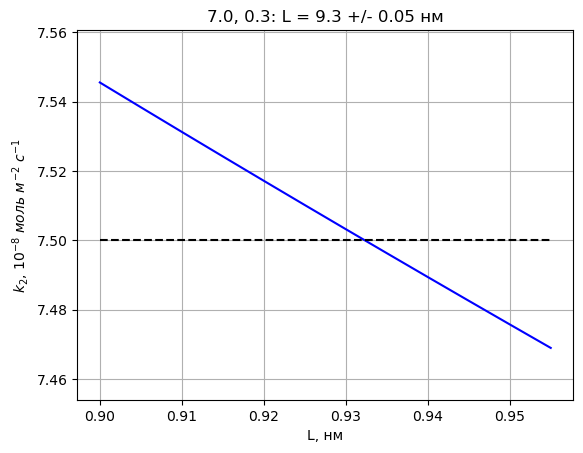

In [46]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr*0.1, K2, 'b')
plt.plot([L_arr[0]*0.1, L_arr[-1]*0.1], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'{k2_0:.1f}, {phi_ext*A_phi:.1f}: L = {L_relax:.1f} +/- {dL:.2f} нм')
plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $\phi_{ext}$ = 0.5 V

In [51]:
id = 1

phi_ext = 0.5/A_phi

L_b = 14
L_e = 15
h = L_b/200
dL = 2*h

T = 50
Ndata = 800


path = path_data + f'L_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'
    
Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

201 40818 802
9


In [52]:
L_arr, K2, L_relax = calc_L_phi(phi_ext, L_b, L_e, dL, h, path)

9
Finished!


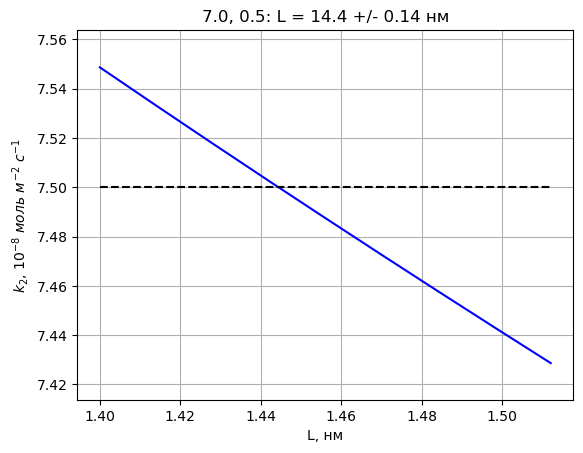

In [54]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr*0.1, K2, 'b')
plt.plot([L_arr[0]*0.1, L_arr[-1]*0.1], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'{k2_0:.1f}, {phi_ext*A_phi:.1f}: L = {L_relax:.1f} +/- {dL:.2f} нм')
plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $\phi_{ext}$ = 1.0 V

In [65]:
id = 2

phi_ext = 1.0/A_phi

L_b = 25
L_e = 26
h = L_b/200
dL = 1*h

T = 90
Ndata = 800


path = path_data + f'L_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'
    
Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

201 23041 796
9


In [66]:
L_arr, K2, L_relax = calc_L_phi(phi_ext, L_b, L_e, dL, h, path)

9
Finished!


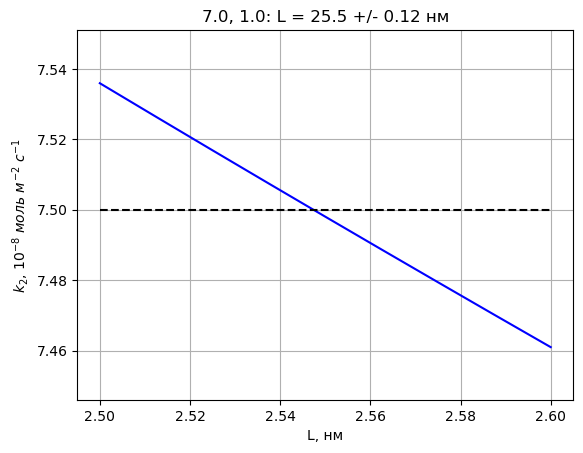

In [67]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))

plt.plot(L_arr*0.1, K2, 'b')
plt.plot([L_arr[0]*0.1, L_arr[-1]*0.1], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'{k2_0:.1f}, {phi_ext*A_phi:.1f}: L = {L_relax:.1f} +/- {dL:.2f} нм')
plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $\phi_{ext}$ = 1.5 V

In [75]:
id = 2

phi_ext = 1.5/A_phi

L_b = 34
L_e = 35
h = L_b/400
dL = 2*h

T = 100
Ndata = 800


path = path_data + f'L_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'
    
Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

401 55365 804
7


In [76]:
L_arr, K2, L_relax = calc_L_phi(phi_ext, L_b, L_e, dL, h, path)

7
Finished!


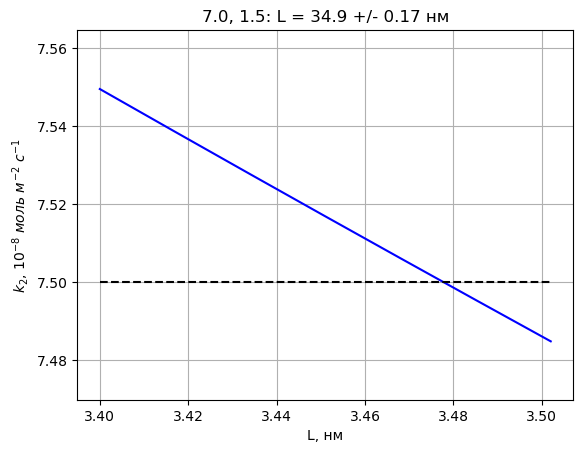

In [78]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))

plt.plot(L_arr*0.1, K2, 'b')
plt.plot([L_arr[0]*0.1, L_arr[-1]*0.1], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'{k2_0:.1f}, {phi_ext*A_phi:.1f}: L = {L_relax:.1f} +/- {dL:.2f} нм')
plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

 # Dependence of L on $\phi_{ext}$

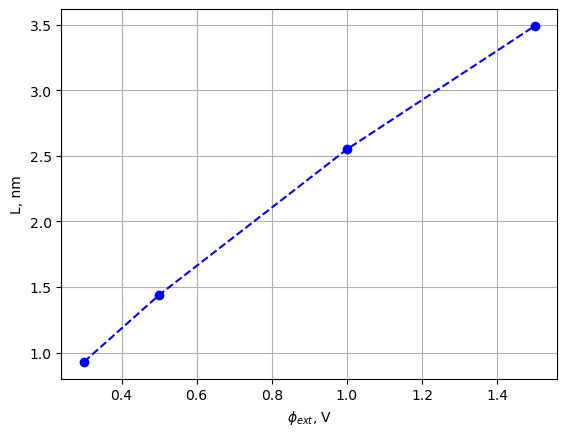

In [81]:
id = 4

Phi_ext = np.array([0.3, 0.5, 1.0, 1.5])
L_relax_arr = np.array([9.3, 14.4, 25.5, 34.9])

np.savetxt(path_data+f'L_phi_{id}.txt', [Phi_ext, L_relax_arr])

plt.plot(Phi_ext, L_relax_arr*0.1, 'bo')
plt.plot(Phi_ext, L_relax_arr*0.1, 'b--')
plt.xlabel(r'$\phi_{ext}$, V')
plt.ylabel('L, nm')
plt.grid()
#plt.savefig(path_data+f'L_phi_{id}.png', format='png', dpi=300)
plt.show()

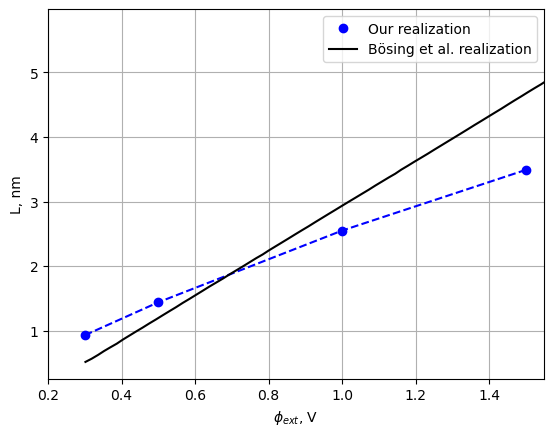

In [82]:
id = 5

Phi_ext_bos = np.loadtxt('C:/Users/OlegKashurin/home/Work/Films/Bosing data/L(phi_ext).txt')[:, 0]
L_relax_arr_bos = np.loadtxt('C:/Users/OlegKashurin/home/Work/Films/Bosing data/L(phi_ext).txt')[:, 1]

# Phi_ext = np.array([0.3, 0.5, 1.0, 1.5])
# L_relax_arr = np.array([6.4, 10.7, 20.4, 29.1])

Phi_ext = np.array([0.3, 0.5, 1.0, 1.5])
L_relax_arr = np.array([9.3, 14.4, 25.5, 34.9])

np.savetxt(path_data+f'L_phi_{id}.txt', [Phi_ext, L_relax_arr])

plt.plot(Phi_ext, L_relax_arr*0.1, 'bo', label='Our realization')
plt.plot(Phi_ext, L_relax_arr*0.1, 'b--')

plt.plot(Phi_ext_bos, L_relax_arr_bos, 'k-', label='Bösing et al. realization')

plt.legend()
plt.xlabel(r'$\phi_{ext}$, V')
plt.ylabel('L, nm')
plt.grid()
plt.xlim([0.2, 1.55])
#plt.savefig(path_data+f'L_phi_{id}.png', format='png', dpi=300)
plt.show()